In [31]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors

%matplotlib inline

# Hyperparamete

In [21]:
N = 1000
size = 46
TOL = 1e-6
Total_loss = []

# Create Data

In [22]:
def create_data(size):
    A_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if i == j:
                A_matrix[i][j] = 2*(i+1)
            if j == (i+1) or j == (i-1):
                A_matrix[i][j] = -1
  
    B_vector = np.array([1.5*i-6 for i in range(size)])
                
    return A_matrix,B_vector

In [23]:
def get_d(matrix):
    size =matrix.shape[0]
    down_m = np.zeros_like(matrix)
    for i in range(size):
        down_m[i][i] = 1/matrix[i][i]**(1/2)
    return down_m   

In [24]:
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))

In [25]:
def draw(loss,title=None):
    
    ite = [i for i in range(1,len(loss)+1,1)]
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(title)
    ax.xaxis.set_major_locator(MultipleLocator(1))
#     ax.yaxis.set_major_locator(MultipleLocator(0.1))

    ax.plot(ite,loss,lw = 1,label = title)
        
    ax.grid(linestyle="--",linewidth = 0.5,zorder = 0)#pair0
    ax.legend()

# Conjugate Gradient Method

In [26]:
def CGM(A_matrix,B_matrix,test=False): 
    
    init_x = np.ones_like(B_matrix,dtype="float64")
    init_r = B_matrix - np.dot(A_matrix,init_x)
    loss = []
    alpha  = np.dot(init_r,init_r)
    init_v = copy.deepcopy(init_r)
    
    k = 1
    while(k<=N):
        if test:
            print(init_x)
        
        u = np.dot(A_matrix,init_v)
        t = alpha/np.dot(init_v,u)
        
        x = init_x + np.dot(t,init_v)
        
        r = init_r - np.dot(t,u)
        
        beta = np.dot(r,r)
        
        esp = escape(init_x,x,TOL)[0]
        loss.append(escape(init_x,x,TOL)[1])
        init_x = x
        init_r = r
        
        if esp:
            break
            
        s = beta/alpha
        v = r + np.dot(s,init_v)
        init_v = v
        init_r = r
        init_x = x
        alpha = beta
        k+=1
        
    return x,loss,k

1000
46
[-4.20772031 -2.41544062 -0.95404214 -0.30881234 -0.01645615  0.14424962
  0.24745426  0.3201055   0.37423921  0.41619668  0.4496935   0.47706457
  0.49985351  0.51912447  0.53563549  0.54994041  0.56245389  0.5734932
  0.58330467  0.59208222  0.59998112  0.60712732  0.61362358  0.61955452
  0.62499087  0.62999227  0.63460887  0.63888325  0.64285219  0.64654748
  0.64999636  0.65322253  0.65624708  0.65908844  0.66176246  0.66428365
  0.66666496  0.66891726  0.67105122  0.67307562  0.67499883  0.67682821
  0.67857045  0.68023074  0.68173466  0.67588842]
33
1 0.4689505551219758
2 0.24973511405174376
3 0.31546998068058496
4 0.45271744246585394
5 0.5837921846715397
6 0.671817605481196
7 0.6848226171764404
8 0.6176294135948388
9 0.49786693282004757
10 0.3663336891536382
11 0.25269110882867096
12 0.167618490150363
13 0.10895858797841296
14 0.07003966712561294
15 0.04446899478353128
16 0.02763617270120111
17 0.0177457660120397
18 0.012558112213997052
19 0.008109020586489102
20 0.0048

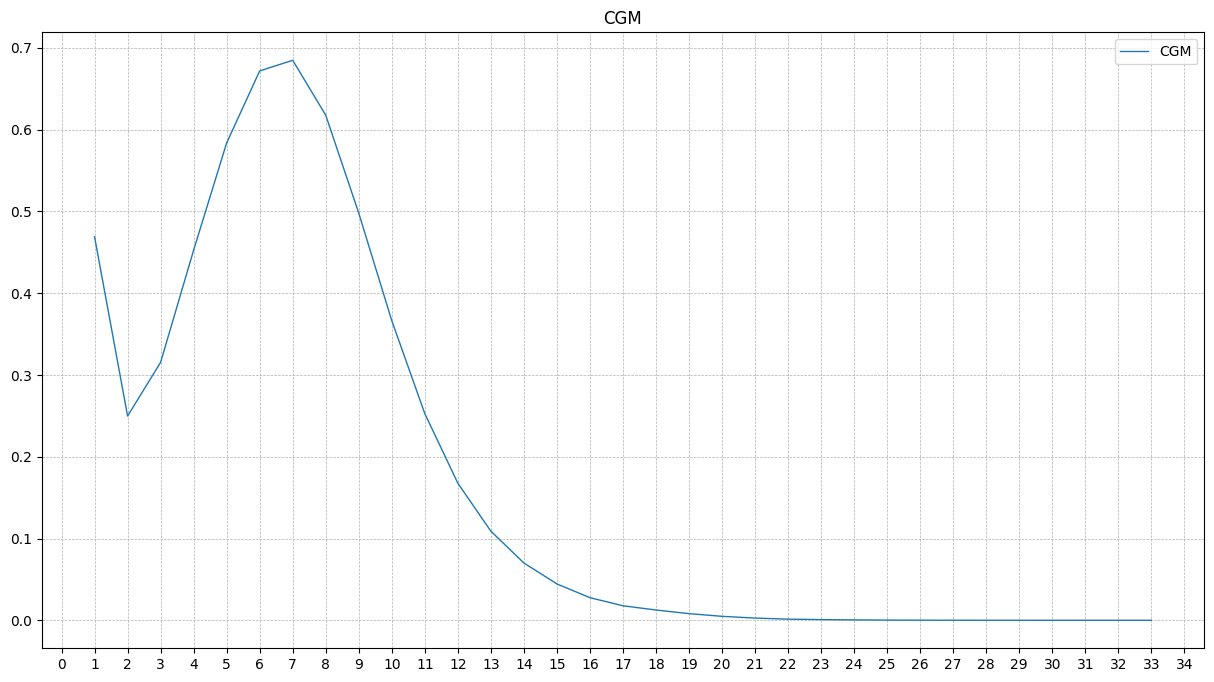

In [37]:
x,loss,k = CGM(create_data(size)[0],create_data(size)[1],test=False)
Total_loss.append([loss,'CGM'])
print(N)
print(size)
print(x)
print(k)

for i,lo in enumerate(loss):
    print(i+1,lo)
draw(loss,'CGM')


# Preconditioning Conjugate Gradient Method

In [28]:
def Pre_CGM(A_matrix,B_matrix,c_matrix,test=False): 
    
    x = np.ones_like(B_matrix,dtype="float64")
    r = B_matrix - np.dot(A_matrix,x)
    w = np.dot(c_matrix,r)
    alpha  = np.dot(w,w)
    loss = []
    
    v = copy.deepcopy(w)
    v = np.dot(c_matrix,v)
    
    
    k = 1
    while(k<=N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        
        u = np.dot(A_matrix,v)
        t = alpha/np.dot(v,u)
        
        x = x + np.dot(t,v)
        
        r = r - np.dot(t,u)
        w = np.dot(c_matrix,r)
        
        beta = np.dot(w,w)
        
        esp = escape(x_p,x,TOL)
        loss.append(esp[1])

        if esp[0]:
            break
            
        s = beta/alpha
        
        z = np.dot(c_matrix,w)
        v = z + np.dot(s,v)
        alpha = beta
        k+=1
        
    return x,loss,k

1000
46
[-4.2077203  -2.41544061 -0.95404216 -0.3088123  -0.01645625  0.14424981
  0.24745397  0.32010582  0.37423902  0.41619664  0.44969368  0.47706446
  0.49985342  0.5191246   0.5356355   0.54994029  0.56245393  0.57349329
  0.58330462  0.59208215  0.59998118  0.60712738  0.61362352  0.61955447
  0.62499094  0.6299923   0.63460881  0.63888323  0.64285225  0.64654748
  0.64999629  0.65322255  0.65624714  0.65908838  0.66176246  0.66428371
  0.66666488  0.66891732  0.67105119  0.67307563  0.67499883  0.67682821
  0.67857045  0.68023074  0.68173466  0.67588842]
9
1 3.8791035263489815
2 1.637997360987388
3 0.45296506361728195
4 0.025066569773266156
5 0.0036114404432459613
6 0.00033815297253703136
7 1.7738527997579467e-05
8 1.4176085731953947e-06
9 6.476526590026843e-08


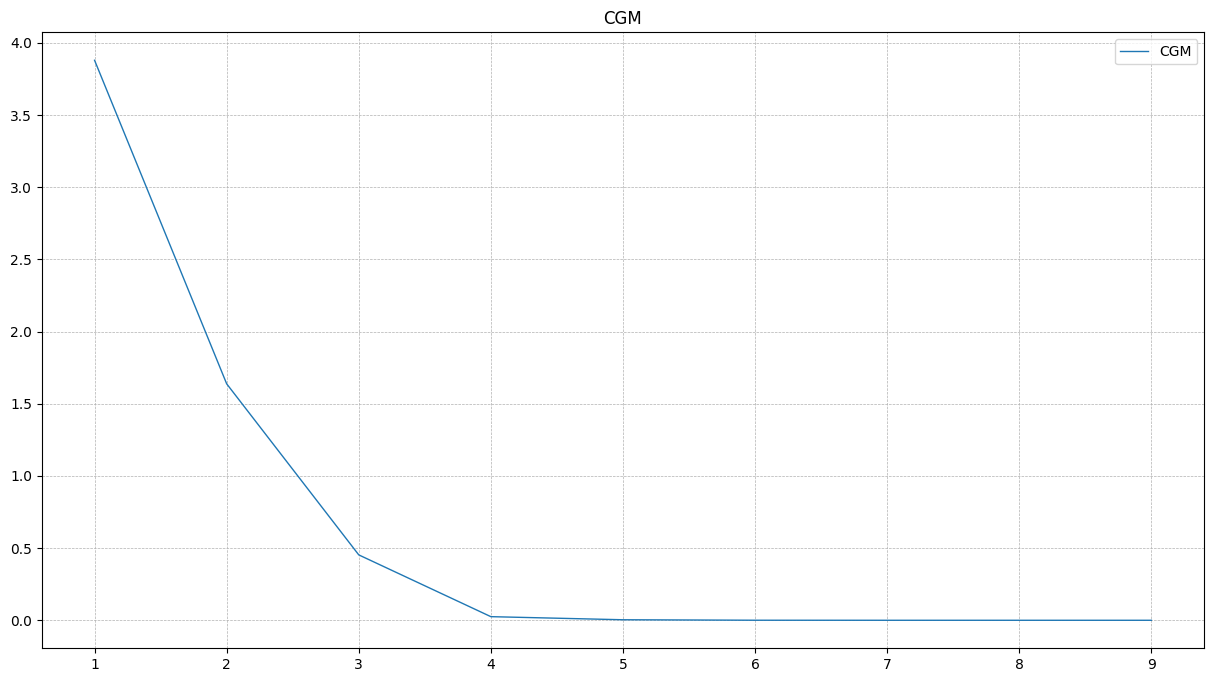

In [39]:
x,loss,k = Pre_CGM(create_data(size)[0],create_data(size)[1],get_d(create_data(size)[0]),test=False)
Total_loss.append([loss,'Pred_CGM'])
print(N)
print(size)
print(x)
print(k)
for i,lo in enumerate(loss):
    print(i+1,lo)
draw(loss,'CGM')

# Summary

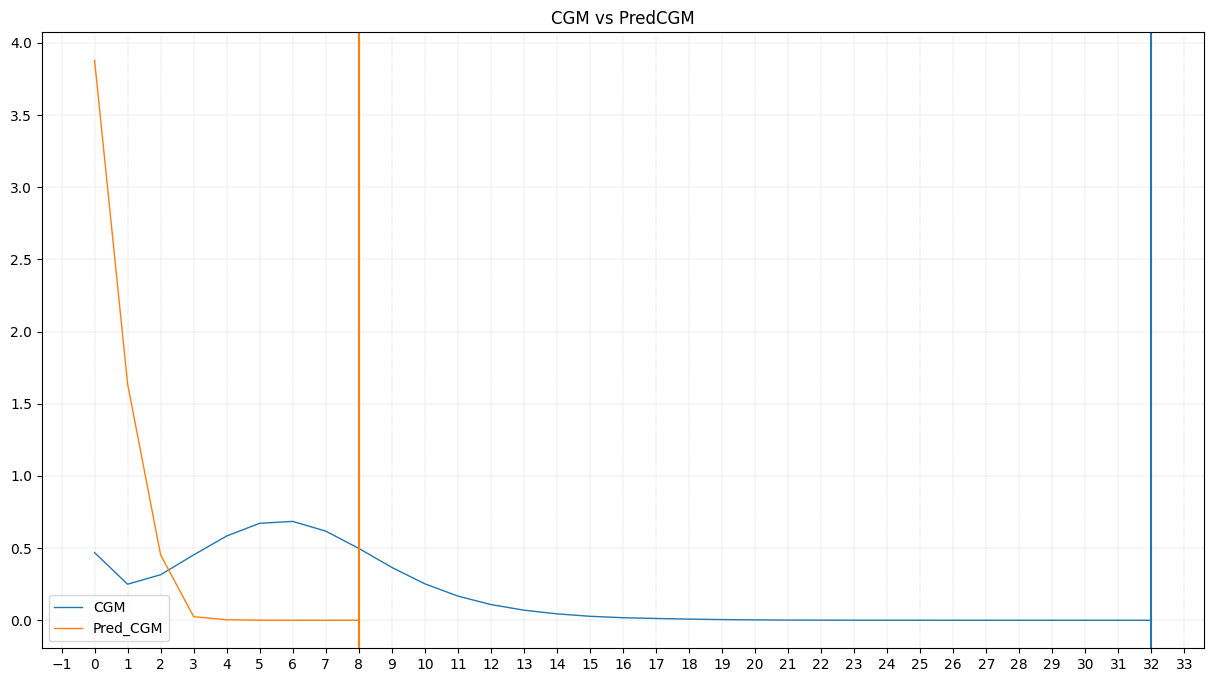

In [33]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
ax.set_title('CGM vs PredCGM')
ax.xaxis.set_major_locator(MultipleLocator(1))
colors=list(mcolors.TABLEAU_COLORS.keys())
for i,(loss,name) in enumerate(Total_loss):
    ax.plot(loss,lw = 1,label = name,color=mcolors.TABLEAU_COLORS[colors[i]])
    plt.axvline(len(loss)-1, linestyle='-',color=mcolors.TABLEAU_COLORS[colors[i]])
    
ax.grid(linestyle="--",linewidth = 0.2,zorder = 0)#pair0
ax.legend()